# Reading the Individual files from ALL directories
# Libraries:
### OS
- OS walks over the directories and reads the files individually

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import netCDF4 as nc

import os

# Ignore Warnings

In [37]:
import warnings

warnings.filterwarnings('ignore')

# EXAMPLE:
- READING the files from the following directory
- FOR 2020 datasets

In [38]:

file_path_2020= []

for root, dirs, files in os.walk('../../data/oco2/scf/product/Lite/B10206Ar/r02/2020/'):
    for filename in files:
        print(os.path.join(root, filename))
        
        # Append the files into list
        file_path_2020.append(os.path.join(root, filename))

../../data/oco2/scf/product/Lite/B10206Ar/r02/2020/01/01/LtCO2/oco2_LtCO2_200101_B10206Ar_200728183348s.nc4
../../data/oco2/scf/product/Lite/B10206Ar/r02/2020/01/02/LtCO2/oco2_LtCO2_200102_B10206Ar_200728203252s.nc4
../../data/oco2/scf/product/Lite/B10206Ar/r02/2020/01/03/LtCO2/oco2_LtCO2_200103_B10206Ar_200728203534s.nc4
../../data/oco2/scf/product/Lite/B10206Ar/r02/2020/01/08/LtCO2/oco2_LtCO2_200108_B10206Ar_200728203546s.nc4
../../data/oco2/scf/product/Lite/B10206Ar/r02/2020/01/09/LtCO2/oco2_LtCO2_200109_B10206Ar_200728203551s.nc4
../../data/oco2/scf/product/Lite/B10206Ar/r02/2020/01/10/LtCO2/oco2_LtCO2_200110_B10206Ar_200728203614s.nc4
../../data/oco2/scf/product/Lite/B10206Ar/r02/2020/01/11/LtCO2/oco2_LtCO2_200111_B10206Ar_200728203647s.nc4
../../data/oco2/scf/product/Lite/B10206Ar/r02/2020/01/12/LtCO2/oco2_LtCO2_200112_B10206Ar_200728203726s.nc4
../../data/oco2/scf/product/Lite/B10206Ar/r02/2020/01/13/LtCO2/oco2_LtCO2_200113_B10206Ar_200728203946s.nc4
../../data/oco2/scf/product/

In [39]:
len(file_path_2020)

356

In [40]:
xco2_2020= []
sounding_id_2020= []

for j in range(0, (len(file_path_2020)-1)):
    df= nc.Dataset(file_path_2020[j])
    
    
    # storing on pandas
    
    #df_2020= pd.DataFrame(df, columns=["Xco2"])`````
    xco2_2020.append(df.variables["xco2"][:])
    sounding_id_2020.append(df.variables["sounding_id"][:])


In [41]:
type(file_path_2020)

list

# Class
- Function to READ the variables via NETCDF library
- Reads the FILES inside the dir and create Dataframe

In [42]:
class readFiles:
    
    oco_files=[]
    xco2= []
    sounding_id= []
    quality_flag= []
    latitude= []
    longitude= []
    
    def __init__(self, filePath):
        self.filePath= filePath
        # Total files in the directory
        self.total= filePath
        
        
        # RETRIEVE the files automatically on the constructor
        for j in range(0, (len(self.total) -1)):
            self.oco_files= nc.Dataset(self.filePath[j])
            
            # read the variables
            self.xco2.append(self.oco_files.variables["xco2"][:])
            self.sounding_id.append(self.oco_files.variables["sounding_id"][:])
            self.quality_flag.append(self.oco_files.variables["xco2_quality_flag"][:])
            self.latitude.append(self.oco_files.variables["latitude"][:])
            self.longitude.append(self.oco_files.variables["longitude"][:])
    
    # return XCO2
    def get_xco2(self):
        return self.xco2
    
    def get_sounding_id(self):
        return self.sounding_id
    
    # return qual flag
    def get_quality_flag(self):
        return self.quality_flag
    
    # reutrn lat
    def get_latitude(self):
        return self.latitude
    
    # reutrn lat
    def get_longitude(self):
        return self.longitude

# TEST: CLASS OBJECT to READ FILES

In [43]:

xco2_2020_files= readFiles(file_path_2020);

In [44]:
# Get the xco2 var from the OBJECT 

xco2_2020= xco2_2020_files.get_xco2()
qual_flag_2020= xco2_2020_files.get_quality_flag()
sounding_id_2020= xco2_2020_files.get_sounding_id()
latitude_2020= xco2_2020_files.get_latitude()
longitude_2020= xco2_2020_files.get_longitude()

# TOTAL RECORDS: Days

In [45]:
len(xco2_2020)

355

In [46]:
df_2020= pd.DataFrame(xco2_2020[0], columns=["Xco2"])

len(df_2020), len(xco2_2020[1])

(170214, 185129)

# APPENDING the columns

In [48]:
%%time
df_2020_comb= pd.DataFrame(columns=["Xco2"])
                                    #, "quality_flag","latitude","longitude","sounding_id"])

for j in range(365):
#for j in range(10):
    
    # FIRST COLdf
    df_2020_comb= df_2020_comb.append(pd.DataFrame(xco2_2020[j], columns=["Xco2"]))
#     df_2020_comb= df_2020_comb.append(pd.DataFrame(qual_flag_2020[j], columns=["quality_flag"]))
#     df_2020_comb= df_2020_comb.append(pd.DataFrame(latitude_2020[j], columns=["latitude"]))
#     df_2020_comb= df_2020_comb.append(pd.DataFrame(longitude_2020[j], columns=["longitude"]))
#     df_2020_comb= df_2020_comb.append(pd.DataFrame(sounding_id_2020[j], columns=["sounding_id"]))

IndexError: list index out of range

In [49]:
len(df_2020_comb)

61646463

# Adding Quality FLAG as new column

In [50]:
%%time
df_2020_comb_qual= pd.DataFrame(columns=["quality_flag"])
                                    #, "quality_flag","latitude","longitude","sounding_id"])

for j in range(365):
    
    # FIRST COL
    df_2020_comb_qual= df_2020_comb_qual.append(pd.DataFrame(qual_flag_2020[j], columns=["quality_flag"]))


IndexError: list index out of range

In [51]:
df_2020_comb_qual

,quality_flag
0,1
1,1
2,1
3,1
4,1
...,...
166351,1
166352,1
166353,1
166354,1


# LONGITUDE and LATITUDE

In [52]:
%%time
df_2020_comb_lat= pd.DataFrame(columns=["latitude"])
                                    #, "quality_flag","latitude","longitude","sounding_id"])

for j in range(365):
    
    # FIRST COL
    df_2020_comb_lat= df_2020_comb_lat.append(pd.DataFrame(latitude_2020[j], columns=["latitude"]))


len(df_2020_comb_lat)

IndexError: list index out of range

# Longitude

In [53]:
%%time
df_2020_comb_long= pd.DataFrame(columns=["longitude"])
                                    #, "quality_flag","latitude","longitude","sounding_id"])

for j in range(365):
    
    # FIRST COL
    df_2020_comb_long= df_2020_comb_long.append(pd.DataFrame(longitude_2020[j], columns=["longitude"]))


IndexError: list index out of range

In [54]:
len(df_2020_comb_long)

61646463

# COMBINE all DATAFRAMES
- Variables for new columns: xco2, quality_Flag, Latitude, Longitude

In [55]:
combined_dataframe= pd.concat([df_2020_comb,df_2020_comb_qual,df_2020_comb_lat, df_2020_comb_long], axis= 1)
combined_dataframe

,Xco2,quality_flag,latitude,longitude
0,407.632629,1,-63.136539,-144.769806
1,405.346191,1,-63.118542,-144.780075
2,409.152313,1,-63.071033,-144.978363
3,409.182678,1,-63.071945,-145.012222
4,408.380798,1,-63.052227,-144.954651
...,...,...,...,...
166351,402.939941,1,-64.381317,-146.030823
166352,403.313538,1,-64.346115,-146.048264
166353,402.081085,1,-64.186279,-146.129028
166354,403.908295,1,-64.133270,-146.155426


# GOOD XCo2 good quality
- Selection of GOOD quality FLAG for analysis

In [56]:
%%time
xco2_good_quality= combined_dataframe[combined_dataframe["quality_flag"]== 0]
len(xco2_good_quality)

CPU times: user 3.41 s, sys: 482 ms, total: 3.89 s
Wall time: 3.89 s


31565083

# XCO2 > 419

In [62]:
xco2_good_quality[xco2_good_quality["Xco2"] > 419]

,Xco2,quality_flag,latitude,longitude
39915,420.254974,0,39.904865,118.599495
39916,419.670685,0,39.898026,118.608894
39922,420.561523,0,39.917988,118.602638
8204,419.822754,0,-77.534050,161.287567
27214,419.059906,0,44.447720,93.903732
...,...,...,...,...
62483,420.213409,0,39.337490,112.504196
62486,419.116699,0,39.306664,112.536140
62501,419.036377,0,39.338543,112.531464
62564,419.372345,0,39.549229,112.444443


# Scatter Plots
## 2020

# TOTAL

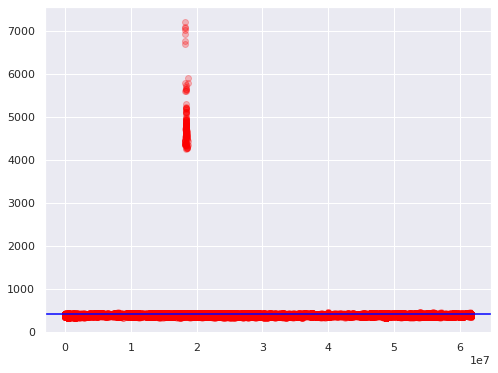

In [57]:
# %%time
plt.scatter(x=np.arange(0, len(combined_dataframe)), y= combined_dataframe["Xco2"], c='red', alpha=0.25)
plt.axhline(y= 419, color='blue')
plt.gcf().set_size_inches(8,6);

# GOOD quality Flag -> 0

CPU times: user 3.55 s, sys: 185 ms, total: 3.74 s
Wall time: 3.75 s


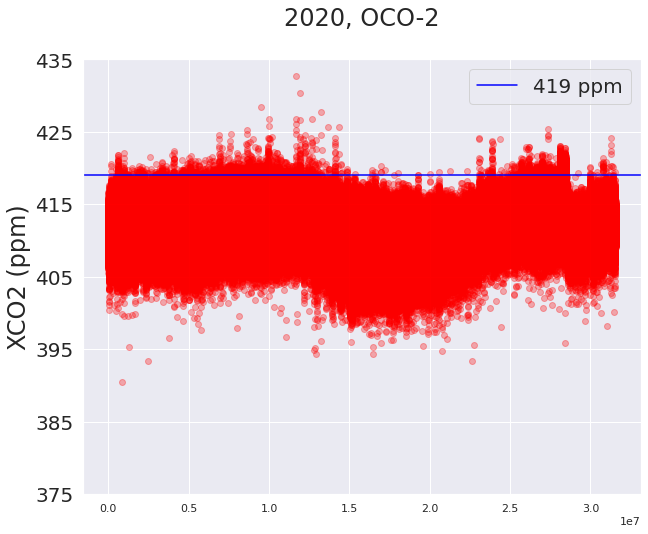

In [58]:
%%time
plt.scatter(x=np.arange(0, len(xco2_good_quality)), y= xco2_good_quality["Xco2"], c='red', alpha=0.30 )
plt.axhline(y= 419, color='blue', label= '419 ppm')
plt.yticks(np.arange(375, 445, 10), fontsize= 20)
plt.title('2020, OCO-2\n', fontsize= 24)
plt.legend(loc= 'upper right', prop={'size': 20})
plt.ylabel('XCO2 (ppm)', fontsize= 24)
plt.gcf().set_size_inches(10,8);

# Scatter plots the datapoints that higher than 419

In [59]:
xco2_good_quality.head(3)

,Xco2,quality_flag,latitude,longitude
3978,409.475403,0,-51.849205,-149.901810
3985,409.189026,0,-51.828705,-149.886642
3986,409.162323,0,-51.831013,-149.908356


In [60]:
xco2_max_419= xco2_good_quality[xco2_good_quality["Xco2"] >419]

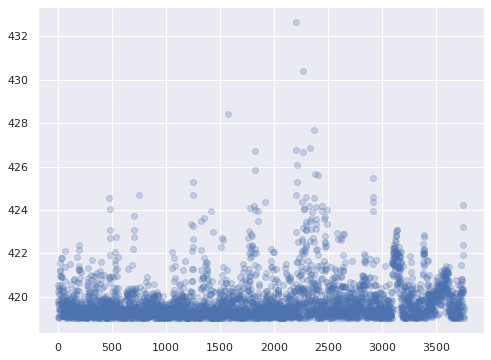

In [61]:
plt.scatter(np.arange(0, len(xco2_max_419)), xco2_max_419["Xco2"], alpha= 0.25)
plt.gcf().set_size_inches(8,6);